In [19]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx


In [20]:
#helpers

def checkData(df):
    print("Shape:", df.shape)
    print("Has Null:", df.isnull().values.any())
    return df.head()

def dropPlayers(df):
    df = df[(df['MIN'] >= 12) & (df['GP'] >= 9)]
    return df

def corrHeatMap(df):
    plt.figure(figsize = (10,10))
    sns.heatmap(df.corr(),
                vmin = -1, vmax = 1, center = 0,
                cmap = sns.diverging_palette(20, 220, n = 500),
                square = True)

def highCorrGraph(df):
    # Create matrix of corrleations and select values only in the upper trinagle (excluding main diagnol)
    corrMatrix = df.corr().abs()
    upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(bool))

    upper = corrMatrix

    # Find features with correlation greater than 0.8 both negative and positives are included
    highCorrCols = []

    for col in upper.columns:
        for i in range(0, len(upper[col])):
            if upper[col][i] > 0.8 and col != upper.index.values[i]:
                highCorrCols.append((col, upper.index.values[i]))
    
    # create and draw graph
    G = nx.Graph()
    G.add_edges_from(highCorrCols)

    plt.figure(figsize = (20,20))
    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size = 1000)
    nx.draw_networkx_edges(G, pos, width = 0.5, arrowsize=100)
    nx.draw_networkx_labels(G, pos, font_size = 10)

    plt.axis("off")
    plt.show()  


**General**
- advanced
- basic
- defense
- scoring
- usage


In [21]:
basicData = pd.read_excel('./Data/General/BasicStats.xlsx')
checkData(basicData)

Shape: (540, 30)
Has Null: False


,Unnamed: 0,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,0,Stephen Curry,GSW,33,63,37,26,34.2,32.0,10.4,21.7,48.2,5.3,12.7,42.1,5.7,6.3,91.6,0.5,5.0,5.5,5.8,3.4,1.2,0.1,1.9,47.9,8,0,3.9
1,1,Bradley Beal,WAS,28,60,32,28,35.8,31.3,11.2,23.0,48.5,2.2,6.2,34.9,6.8,7.7,88.9,1.2,3.5,4.7,4.4,3.1,1.2,0.4,2.3,45.0,4,0,-0.1
2,2,Damian Lillard,POR,30,67,39,28,35.8,28.8,9.0,19.9,45.1,4.1,10.5,39.1,6.7,7.2,92.8,0.5,3.7,4.2,7.5,3.0,0.9,0.3,1.5,45.7,16,0,3.0
3,3,Joel Embiid,PHI,27,51,39,12,31.1,28.5,9.0,17.6,51.3,1.1,3.0,37.7,9.2,10.7,85.9,2.2,8.4,10.6,2.8,3.1,1.0,1.4,2.4,49.3,31,0,7.9
4,4,Giannis Antetokounmpo,MIL,26,61,40,21,33.0,28.1,10.3,18.0,56.9,1.1,3.6,30.3,6.5,9.5,68.5,1.6,9.4,11.0,5.9,3.4,1.2,1.2,2.8,53.9,41,7,6.7


In [22]:
basicData.drop("Unnamed: 0", axis=1, inplace=True)
basicData = dropPlayers(basicData)

checkData(basicData)

Shape: (397, 29)
Has Null: False


,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Stephen Curry,GSW,33,63,37,26,34.2,32.0,10.4,21.7,48.2,5.3,12.7,42.1,5.7,6.3,91.6,0.5,5.0,5.5,5.8,3.4,1.2,0.1,1.9,47.9,8,0,3.9
1,Bradley Beal,WAS,28,60,32,28,35.8,31.3,11.2,23.0,48.5,2.2,6.2,34.9,6.8,7.7,88.9,1.2,3.5,4.7,4.4,3.1,1.2,0.4,2.3,45.0,4,0,-0.1
2,Damian Lillard,POR,30,67,39,28,35.8,28.8,9.0,19.9,45.1,4.1,10.5,39.1,6.7,7.2,92.8,0.5,3.7,4.2,7.5,3.0,0.9,0.3,1.5,45.7,16,0,3.0
3,Joel Embiid,PHI,27,51,39,12,31.1,28.5,9.0,17.6,51.3,1.1,3.0,37.7,9.2,10.7,85.9,2.2,8.4,10.6,2.8,3.1,1.0,1.4,2.4,49.3,31,0,7.9
4,Giannis Antetokounmpo,MIL,26,61,40,21,33.0,28.1,10.3,18.0,56.9,1.1,3.6,30.3,6.5,9.5,68.5,1.6,9.4,11.0,5.9,3.4,1.2,1.2,2.8,53.9,41,7,6.7


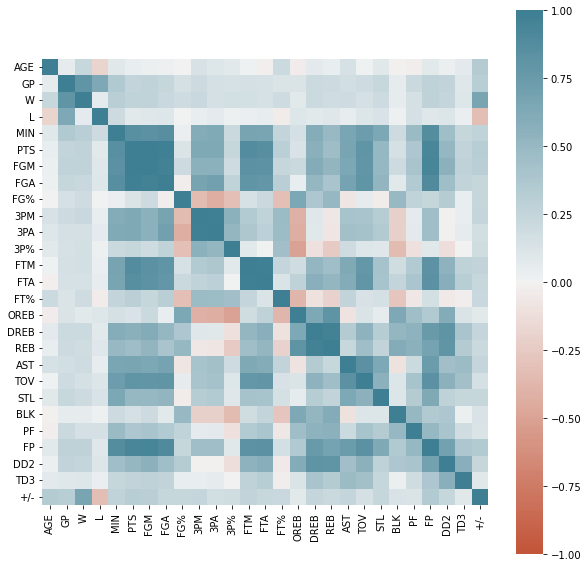

In [23]:
corrHeatMap(basicData)

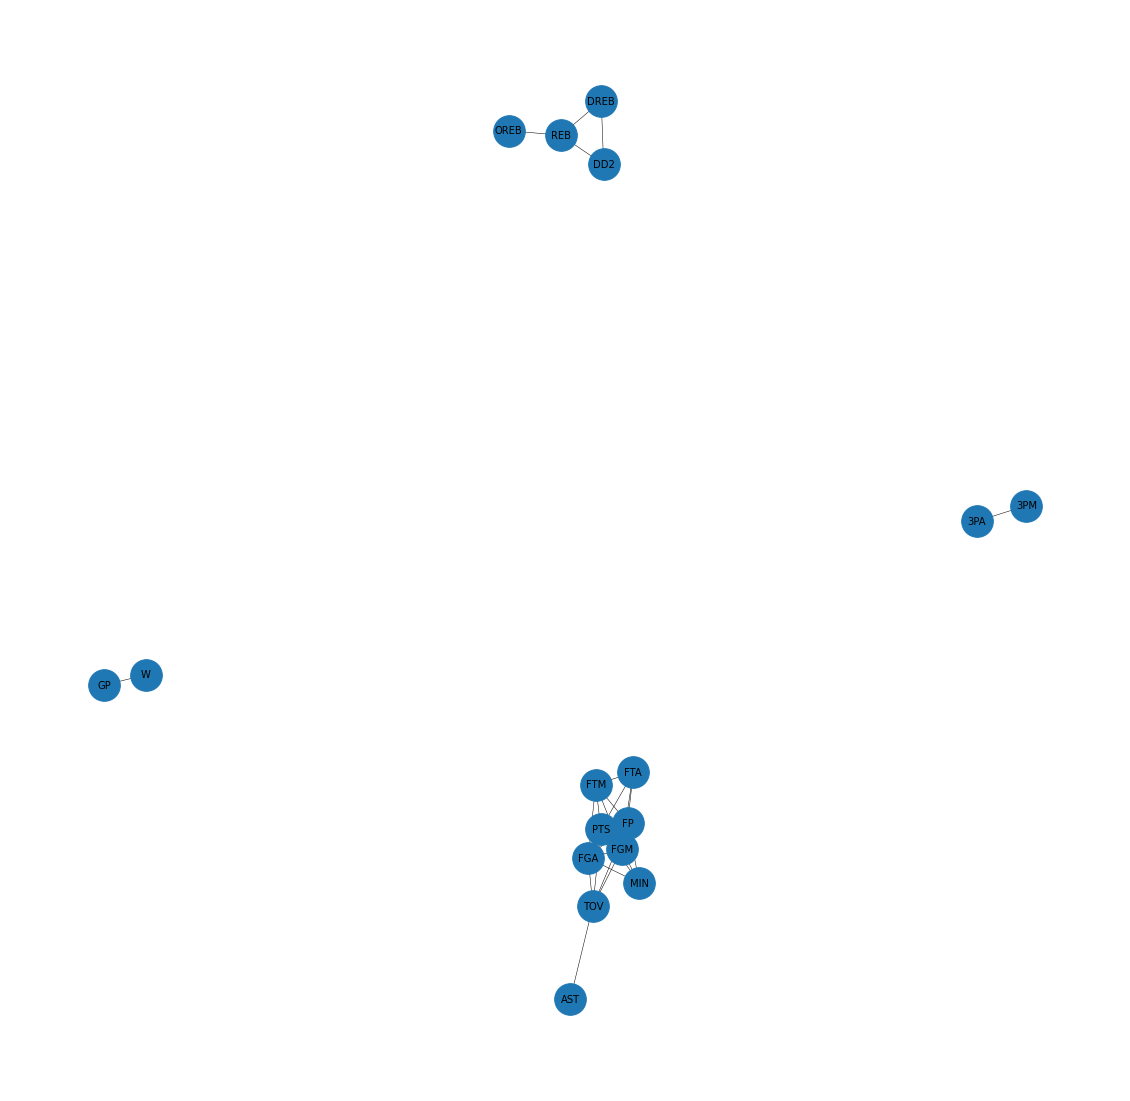

In [24]:
highCorrGraph(basicData)